In [1]:
# Instalar y cargar librerías necesarias
!pip install pandas openpyxl matplotlib seaborn scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [5]:
import pandas as pd
from google.colab import files

# Pedir al usuario que suba el archivo Excel
print("Por favor, sube el archivo Excel (BD Tablero de Ahorros):")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Cargar la hoja "BD" del archivo Excel
df = pd.read_excel(file_name, sheet_name="BD", engine='openpyxl')

# Mostrar las primeras filas antes de la limpieza
print("\n📊 Primeras filas del DataFrame (antes de limpieza):")
print(df.head())

# Eliminar filas donde la columna 'Iniciativa' tenga NaN
if 'Iniciativa' in df.columns:
    df = df.dropna(subset=['Iniciativa'])
    print("\n✅ Se eliminaron las filas donde 'Iniciativa' es NaN.")

# Eliminar filas donde la columna 'Ahorro' tenga NaN (columna objetivo)
if 'Ahorro' in df.columns:
    df = df.dropna(subset=['Ahorro'])
    print("\n✅ Se eliminaron las filas donde 'Ahorro' es NaN.")

# Mostrar el DataFrame después de la limpieza
print("\n📊 Primeras filas del DataFrame (después de limpieza):")
print(df.head())

# Mostrar la lista de columnas disponibles
print("\n📌 Columnas en el DataFrame:")
print(df.columns.tolist())

NameError: name 'df' is not defined

In [ ]:
# Preparar los datos para el modelo
X = df[['Días desde inicio']]
y = df['Ahorro']

# Imputar valores NaN en X usando la media de la columna
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Dividir los datos en conjunto de entrenamiento y prueba
# test_size=0.2 significa que el 20% de los datos se usa para pruebas
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [ ]:
# Visualización de las primeras filas del DataFrame para entender su estructura
print("Primeras 5 filas del DataFrame:")
print(df.head())

# Información sobre las columnas del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Contar la cantidad de valores nulos por columna
print("\nNúmero de valores nulos por columna:")
print(df.isnull().sum())

In [4]:
# Entrenar el modelo de regresión lineal
#model = LinearRegression()
from sklearn.linear_model import Lasso # Import the Lasso class
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizar resultados de la predicción
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Días desde inicio')
plt.ylabel('Ahorro')
plt.title('Regresión Lineal de Ahorros')
plt.show()

NameError: name 'X_train' is not defined

In [ ]:
# Predecir ahorros para los próximos meses
dias_futuros = pd.DataFrame({'Días desde inicio': [df['Días desde inicio'].max() + 30]})  # Añadir 30 días más
predicción = model.predict(dias_futuros)

# Formatear la predicción en millones con separadores de miles y millones
def format_millions(value):
    # Convertir a millones y formatear
    millions = value / 1_000_000
    formatted = f"{millions:.2f}".replace('.', ',').replace(',', '.', 1).replace(',', "'")
    return formatted

print(f'Ahorro predicho para el próximo mes: {format_millions(predicción[0])} millones')

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Categoria de ahorro_Contratación / T.I.
- Categoria de ahorro_Iniciativa Propia
- Categoria de ahorro_Iniciativa Propia con ExOp
- Estado del proyecto_Estabilización
- Estado del proyecto_Ideación
- ...


#Análisis para Junio 2024 - Enero 2025

<ipython-input-9-98b943328877>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Año-Mes'] = df_filtrado['Fecha del ahorro'].dt.to_period('M')


   Año-Mes Ahorro Formateado Ahorro Acumulado Formateado
0  2024-06            157.12                      157.12
1  2024-07             98.02                      255.14
2  2024-08            128.51                      383.66
3  2024-09            119.27                      502.92
4  2024-10            131.65                      634.57
5  2024-11            145.37                      779.95
6  2024-12          13589.88                    14369.82
7  2025-01           1387.43                    15757.25


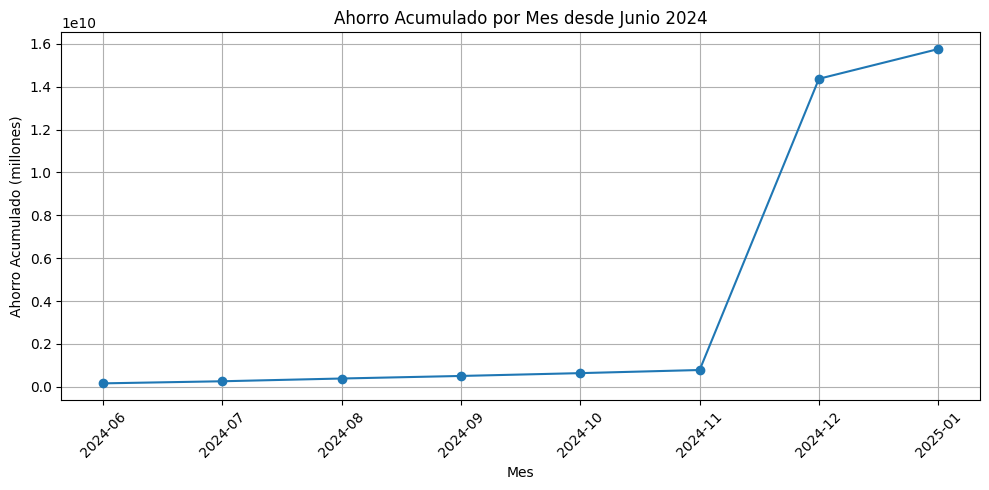

In [ ]:
import pandas as pd

# Asegúrate de que el DataFrame 'df' está cargado y 'Fecha del ahorro' está en formato datetime
df['Fecha del ahorro'] = pd.to_datetime(df['Fecha del ahorro'], errors='coerce')

# Filtrar el DataFrame para incluir solo las fechas desde junio de 2024
df_filtrado = df[df['Fecha del ahorro'] >= pd.to_datetime('2024-06-01')]

# Agrupar por mes y sumar el ahorro
# Crear una nueva columna 'Año-Mes' para agrupar por
df_filtrado['Año-Mes'] = df_filtrado['Fecha del ahorro'].dt.to_period('M')

# Agrupar y sumar los ahorros por mes
ahorros_por_mes = df_filtrado.groupby('Año-Mes')['Ahorro'].sum().reset_index()
ahorros_por_mes.columns = ['Año-Mes', 'Ahorro']

# Calcular el ahorro acumulado
ahorros_por_mes['Ahorro Acumulado'] = ahorros_por_mes['Ahorro'].cumsum()

# Formatear los ahorros en millones
def format_millions(value):
    millions = value / 1_000_000
    formatted = f"{millions:.2f}".replace('.', ',').replace(',', '.', 1).replace(',', "'")
    return formatted

ahorros_por_mes['Ahorro Formateado'] = ahorros_por_mes['Ahorro'].apply(format_millions)
ahorros_por_mes['Ahorro Acumulado Formateado'] = ahorros_por_mes['Ahorro Acumulado'].apply(format_millions)

# Mostrar resultados
print(ahorros_por_mes[['Año-Mes', 'Ahorro Formateado', 'Ahorro Acumulado Formateado']])

# Para una mejor visualización, podrías querer graficar esto
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(ahorros_por_mes['Año-Mes'].astype(str), ahorros_por_mes['Ahorro Acumulado'], marker='o')
plt.xlabel('Mes')
plt.ylabel('Ahorro Acumulado (millones)')
plt.title('Ahorro Acumulado por Mes desde Junio 2024')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-10-3bb396b63171>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Año-Mes'] = df_filtrado['Fecha del ahorro'].dt.to_period('M')


   Año-Mes Ahorro Formateado
0  2024-06            157.12
1  2024-07             98.02
2  2024-08            128.51
3  2024-09            119.27
4  2024-10            131.65
5  2024-11            145.37
6  2024-12          13589.88
7  2025-01           1387.43


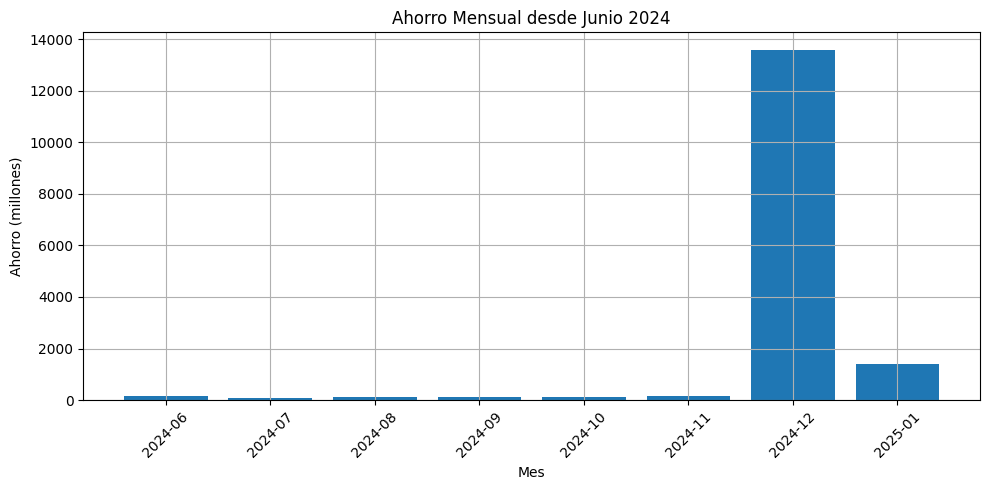

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que el DataFrame 'df' está cargado y 'Fecha del ahorro' está en formato datetime
df['Fecha del ahorro'] = pd.to_datetime(df['Fecha del ahorro'], errors='coerce')

# Filtrar el DataFrame para incluir solo las fechas desde junio de 2024
df_filtrado = df[df['Fecha del ahorro'] >= pd.to_datetime('2024-06-01')]

# Crear una nueva columna 'Año-Mes' para agrupar por mes
df_filtrado['Año-Mes'] = df_filtrado['Fecha del ahorro'].dt.to_period('M')

# Agrupar y sumar los ahorros por mes
ahorros_por_mes = df_filtrado.groupby('Año-Mes')['Ahorro'].sum().reset_index()
ahorros_por_mes.columns = ['Año-Mes', 'Ahorro']

# Formatear los ahorros en millones
def format_millions(value):
    millions = value / 1_000_000
    formatted = f"{millions:.2f}".replace('.', ',').replace(',', '.', 1).replace(',', "'")
    return formatted

ahorros_por_mes['Ahorro Formateado'] = ahorros_por_mes['Ahorro'].apply(format_millions)

# Mostrar resultados
print(ahorros_por_mes[['Año-Mes', 'Ahorro Formateado']])

# Para una mejor visualización, podrías querer graficar esto
plt.figure(figsize=(10, 5))
plt.bar(ahorros_por_mes['Año-Mes'].astype(str), ahorros_por_mes['Ahorro'] / 1_000_000)  # Dividir para mostrar en millones
plt.xlabel('Mes')
plt.ylabel('Ahorro (millones)')
plt.title('Ahorro Mensual desde Junio 2024')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#Predicciones mes a mes hasta Diciembre de 2025

   Fecha del ahorro Ahorro Formateado
0        2025-02-01            492.16
1        2025-03-01            537.55
2        2025-04-01            587.80
3        2025-05-01            636.44
4        2025-06-01            686.69
5        2025-07-01            735.32
6        2025-08-01            785.58
7        2025-09-01            835.83
8        2025-10-01            884.47
9        2025-11-01            934.72
10       2025-12-01            983.35


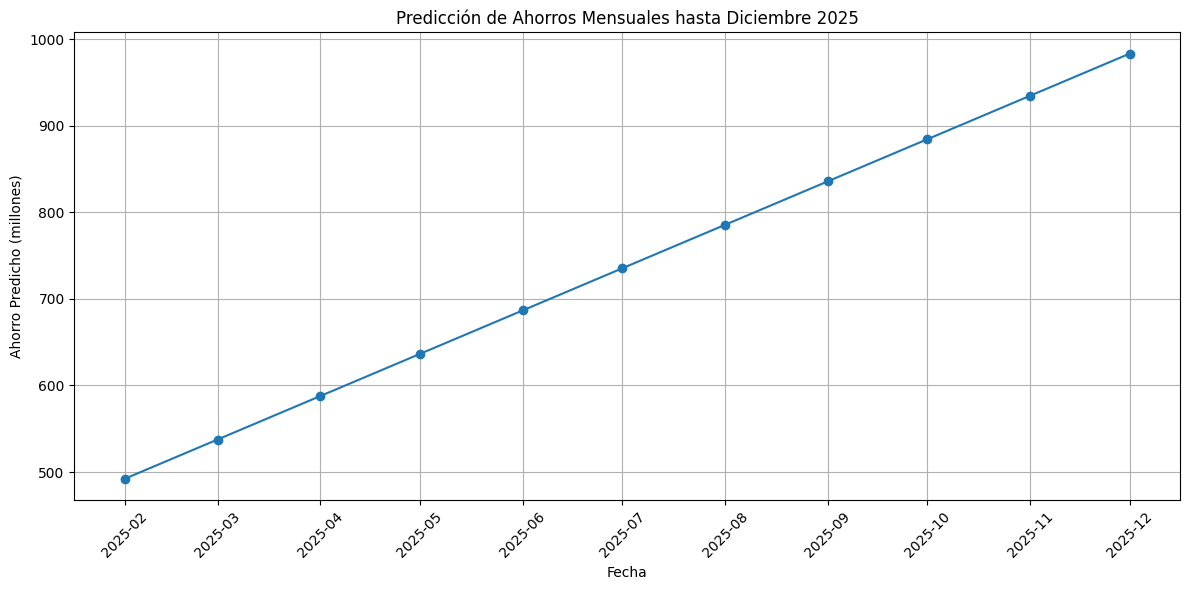

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suponemos que ya tienes 'model' entrenado y 'df' con datos hasta cierto punto

# Encontrar la fecha máxima en el DataFrame existente
max_date = df['Fecha del ahorro'].max()

# Generar fechas futuras hasta diciembre de 2025
future_dates = pd.date_range(start=max_date + pd.Timedelta(days=1), end='2025-12-01', freq='MS')

# Crear DataFrame con las fechas futuras
future_df = pd.DataFrame({
    'Fecha del ahorro': future_dates
})

# Crear la columna 'Días desde inicio' para las fechas futuras
future_df['Días desde inicio'] = (future_df['Fecha del ahorro'] - df['Fecha del ahorro'].min()).dt.days

# Usar el modelo entrenado para predecir los ahorros
X_future = future_df[['Días desde inicio']]
predictions = model.predict(X_future)

# Añadir las predicciones al DataFrame futuro
future_df['Ahorro Predicho'] = predictions

# Formatear los ahorros en millones
def format_millions(value):
    millions = value / 1_000_000
    formatted = f"{millions:.2f}".replace('.', ',').replace(',', '.', 1).replace(',', "'")
    return formatted

future_df['Ahorro Formateado'] = future_df['Ahorro Predicho'].apply(format_millions)

# Mostrar las predicciones
print(future_df[['Fecha del ahorro', 'Ahorro Formateado']])

# Gráfica de predicciones
plt.figure(figsize=(12, 6))
plt.plot(future_df['Fecha del ahorro'], future_df['Ahorro Predicho'] / 1_000_000, marker='o')  # Dividir para mostrar en millones
plt.xlabel('Fecha')
plt.ylabel('Ahorro Predicho (millones)')
plt.title('Predicción de Ahorros Mensuales hasta Diciembre 2025')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Suponemos que 'df' es tu DataFrame con datos históricos y 'future_df' contiene las predicciones
# Asegúrate de que 'Fecha del ahorro' sea de tipo datetime en ambos DataFrames

# Combinar datos históricos y predicciones
# Si 'Ahorro' en 'df' es 'Ahorro' y en 'future_df' es 'Ahorro Predicho', renombramos para consistencia
future_df = future_df.rename(columns={'Ahorro Predicho': 'Ahorro'})

# Concatenar los DataFrames, manteniendo solo las columnas necesarias
combined_df = pd.concat([df[['Fecha del ahorro', 'Ahorro']], future_df[['Fecha del ahorro', 'Ahorro']]], ignore_index=True)

# Filtrar para obtener solo los datos de 2025
df_2025 = combined_df[combined_df['Fecha del ahorro'].dt.year == 2025]

# Sumar todos los ahorros de 2025
total_ahorro_2025 = df_2025['Ahorro'].sum()

# Formatear el total en millones
def format_millions(value):
    millions = value / 1_000_000
    formatted = f"{millions:.2f}".replace('.', ',').replace(',', '.', 1).replace(',', "'")
    return formatted

print(f"Ahorro total proyectado para 2025: {format_millions(total_ahorro_2025)} millones")

Ahorro total proyectado para 2025: 9487.34 millones


   Fecha del ahorro Ahorro Total Formateado
43       2023-10-01                    1.57
28       2023-11-01                   10.72
44       2023-11-01                   42.06
29       2023-12-01                   35.07
45       2023-12-01                    1.46
..              ...                     ...
6               NaT                    0.00
23              NaT                    0.00
24              NaT                    0.00
25              NaT                    0.00
26              NaT                    0.00

[120 rows x 2 columns]


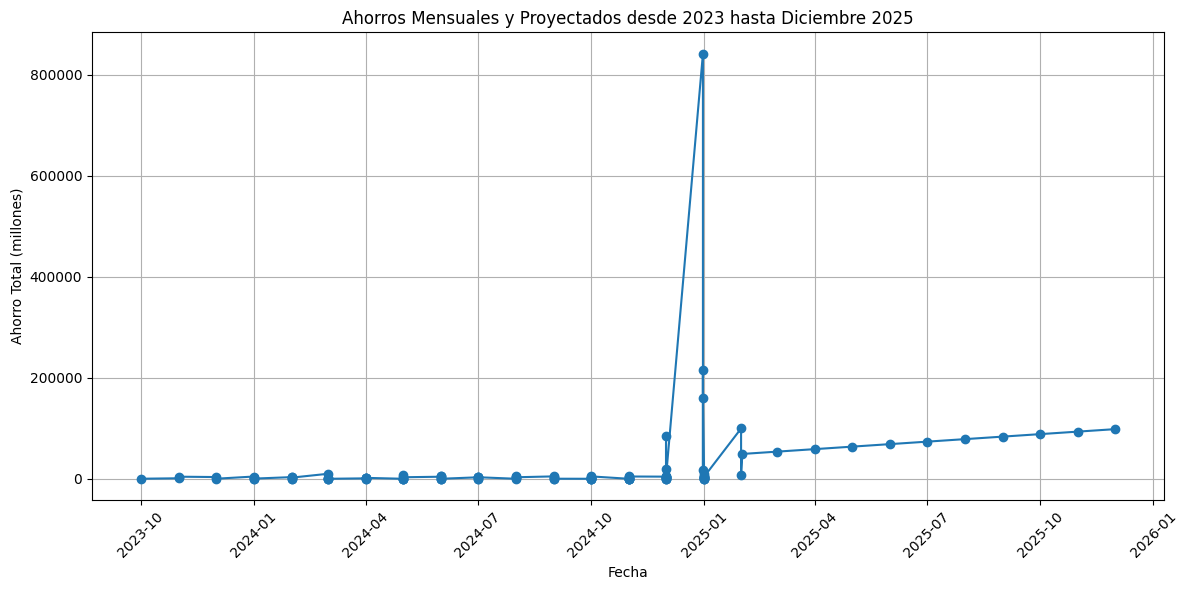

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suponemos que ya tienes 'model' entrenado y 'df' con datos hasta enero de 2025

# Encontrar la fecha máxima en el DataFrame existente
max_date = df['Fecha del ahorro'].max()

# Generar fechas futuras hasta diciembre de 2025
future_dates = pd.date_range(start=max_date + pd.Timedelta(days=1), end='2025-12-01', freq='MS')

# Crear DataFrame con las fechas futuras
future_df = pd.DataFrame({
    'Fecha del ahorro': future_dates
})

# Crear la columna 'Días desde inicio' para las fechas futuras
future_df['Días desde inicio'] = (future_df['Fecha del ahorro'] - df['Fecha del ahorro'].min()).dt.days

# Usar el modelo entrenado para predecir los ahorros
X_future = future_df[['Días desde inicio']]
predictions = model.predict(X_future)

# Añadir las predicciones al DataFrame futuro
future_df['Ahorro'] = predictions

# Combinar datos históricos y predicciones en un solo DataFrame
# Renombramos 'Ahorro' en 'future_df' a 'Ahorro Predicho' para distinguirlos
future_df = future_df.rename(columns={'Ahorro': 'Ahorro Predicho'})

# Concatenar los DataFrames
combined_df = pd.concat([
    df[['Fecha del ahorro', 'Ahorro']],  # Datos históricos
    future_df[['Fecha del ahorro', 'Ahorro Predicho']]  # Predicciones futuras
], ignore_index=True)

# Ordenar por fecha
combined_df = combined_df.sort_values('Fecha del ahorro')

# Formatear los ahorros en millones
def format_millions(value):
    if not np.isnan(value):  # Verificar si el valor no es NaN
        millions = value / 1_000_000
        formatted = f"{millions:.2f}".replace('.', ',').replace(',', '.', 1).replace(',', "'")
        return formatted
    else:
        return '0.00'

# Aplicar formato a ambos tipos de ahorro
combined_df['Ahorro Formateado'] = combined_df['Ahorro'].apply(format_millions)
combined_df['Ahorro Predicho Formateado'] = combined_df['Ahorro Predicho'].apply(format_millions)

# Crear una columna que combine ambos ahorros
combined_df['Ahorro Total Formateado'] = combined_df.apply(
    lambda row: row['Ahorro Formateado'] if pd.notna(row['Ahorro']) else row['Ahorro Predicho Formateado'],
    axis=1
)

# Seleccionar las columnas que deseas mostrar
output_df = combined_df[['Fecha del ahorro', 'Ahorro Total Formateado']]

# Mostrar la tabla
print(output_df)

# Exportar a Excel
output_df.to_excel('ahorros_mensuales.xlsx', index=False)

# Opcional: Gráfica para visualización
plt.figure(figsize=(12, 6))
plt.plot(output_df['Fecha del ahorro'],
         output_df['Ahorro Total Formateado'].apply(lambda x: float(x.replace("'", "").replace(".", "").replace(",", "."))),
         marker='o')
plt.xlabel('Fecha')
plt.ylabel('Ahorro Total (millones)')
plt.title('Ahorros Mensuales y Proyectados desde 2023 hasta Diciembre 2025')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Suponemos que ya tienes 'model' entrenado y 'df' con datos hasta enero de 2025

# Encontrar la fecha máxima en el DataFrame existente
max_date = df['Fecha del ahorro'].max()

# Generar fechas futuras hasta diciembre de 2025
future_dates = pd.date_range(start=max_date + pd.Timedelta(days=1), end='2025-12-01', freq='MS')

# Crear DataFrame con las fechas futuras
future_df = pd.DataFrame({
    'Fecha del ahorro': future_dates
})

# Crear la columna 'Días desde inicio' para las fechas futuras
future_df['Días desde inicio'] = (future_df['Fecha del ahorro'] - df['Fecha del ahorro'].min()).dt.days

# Usar el modelo entrenado para predecir los ahorros
X_future = future_df[['Días desde inicio']]
predictions = model.predict(X_future)

# Añadir las predicciones al DataFrame futuro
future_df['Ahorro'] = predictions

# Combinar datos históricos y predicciones en un solo DataFrame
# Renombramos 'Ahorro' en 'future_df' a 'Ahorro Predicho' para distinguirlos
future_df = future_df.rename(columns={'Ahorro': 'Ahorro Predicho'})

# Concatenar los DataFrames
combined_df = pd.concat([
    df[['Fecha del ahorro', 'Ahorro']],  # Datos históricos
    future_df[['Fecha del ahorro', 'Ahorro Predicho']]  # Predicciones futuras
], ignore_index=True)

# Ordenar por fecha
combined_df = combined_df.sort_values('Fecha del ahorro')

# Formatear los ahorros en millones
def format_millions(value):
    if not np.isnan(value):  # Verificar si el valor no es NaN
        millions = value / 1_000_000
        formatted = f"{millions:.2f}".replace('.', ',').replace(',', '.', 1).replace(',', "'")
        return formatted
    else:
        return '0.00'

# Aplicar formato a ambos tipos de ahorro
combined_df['Ahorro Formateado'] = combined_df['Ahorro'].apply(format_millions)
combined_df['Ahorro Predicho Formateado'] = combined_df['Ahorro Predicho'].apply(format_millions)

# Crear una columna que combine ambos ahorros
combined_df['Ahorro Total Formateado'] = combined_df.apply(
    lambda row: row['Ahorro Formateado'] if pd.notna(row['Ahorro']) else row['Ahorro Predicho Formateado'],
    axis=1
)

# Seleccionar las columnas que deseas mostrar
output_df = combined_df[['Fecha del ahorro', 'Ahorro Total Formateado']]

# Mostrar la tabla
print(output_df)

# Exportar a Excel
output_df.to_excel('ahorros_mensuales.xlsx', index=False)

   Fecha del ahorro Ahorro Total Formateado
43       2023-10-01                    1.57
28       2023-11-01                   10.72
44       2023-11-01                   42.06
29       2023-12-01                   35.07
45       2023-12-01                    1.46
..              ...                     ...
6               NaT                    0.00
23              NaT                    0.00
24              NaT                    0.00
25              NaT                    0.00
26              NaT                    0.00

[120 rows x 2 columns]


#Comportamiento 2023-2026

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Función para formatear los ahorros en millones
def format_millions(value):
    if not np.isnan(value):  # Verificar si el valor no es NaN
        millions = value / 1_000_000
        formatted = f"{millions:.2f}".replace('.', ',').replace(',', '.', 1).replace(',', "'")
        return formatted
    else:
        return '0.00'

# Suponemos que 'df' ya está cargado con los datos necesarios
# y que 'Fecha del ahorro' está en formato datetime

# Convertir 'Fecha del ahorro' a tipo datetime si no está ya
df['Fecha del ahorro'] = pd.to_datetime(df['Fecha del ahorro'], errors='coerce')

# Calcular 'Días desde inicio' para todos los datos
df['Días desde inicio'] = (df['Fecha del ahorro'] - df['Fecha del ahorro'].min()).dt.days

proyectos = df['Iniciativa'].unique()
modelos_por_proyecto = {}
predicciones_por_proyecto = {}

for proyecto in proyectos:
    df_proyecto = df[df['Iniciativa'] == proyecto]

    if df_proyecto['Días desde inicio'].dropna().empty:
        print(f"Proyecto {proyecto} no tiene suficientes datos para el análisis.")
        continue

    X = df_proyecto[['Días desde inicio']]
    y = df_proyecto['Ahorro']

    # Imputar valores NaN solo si hay datos válidos
    if not X['Días desde inicio'].dropna().empty:
        imputer = SimpleImputer(strategy='mean')
        X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    else:
        print(f"Proyecto {proyecto} no tiene suficientes datos para la imputación.")
        continue

    # Solo proceder si hay datos para entrenar el modelo
    if len(X_imputed) > 1:  # Necesitamos al menos dos puntos de datos para una regresión lineal
        X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

        model = LinearRegression()
        model.fit(X_train, y_train)

        modelos_por_proyecto[proyecto] = model

        max_date_proyecto = df_proyecto['Fecha del ahorro'].max()
        future_dates = pd.date_range(start=max_date_proyecto + pd.Timedelta(days=1), end='2025-12-01', freq='MS')

        future_df_proyecto = pd.DataFrame({
            'Fecha del ahorro': future_dates,
            'Días desde inicio': (future_dates - df_proyecto['Fecha del ahorro'].min()).days
        })

        X_future = future_df_proyecto[['Días desde inicio']]
        predicciones = model.predict(X_future)

        future_df_proyecto['Ahorro Predicho'] = predicciones
        future_df_proyecto['Ahorro Formateado'] = future_df_proyecto['Ahorro Predicho'].apply(format_millions)
        predicciones_por_proyecto[proyecto] = future_df_proyecto
    else:
        print(f"Proyecto {proyecto} no tiene suficientes datos para entrenar el modelo.")

# Imprimir las predicciones por proyecto
for proyecto, predicciones in predicciones_por_proyecto.items():
    print(f"Predicciones para {proyecto}:")
    print(predicciones[['Fecha del ahorro', 'Ahorro Formateado']])

# Exportar predicciones a archivos Excel por proyecto
for proyecto, predicciones in predicciones_por_proyecto.items():
    predicciones[['Fecha del ahorro', 'Ahorro Formateado']].to_excel(f'ahorros_{proyecto}.xlsx', index=False)

# Combinar todas las predicciones en un solo DataFrame si así se desea
if predicciones_por_proyecto:
    combined_predictions = pd.concat([df.set_index('Fecha del ahorro') for df in predicciones_por_proyecto.values()],
                                      keys=predicciones_por_proyecto.keys(),
                                      names=['Proyecto', 'index']).reset_index(level='index', drop=True)
    combined_predictions.to_excel('todos_los_ahorros_proyectados.xlsx')
else:
    print("No hay predicciones para combinar.")

Proyecto Optimización Programación Parques no tiene suficientes datos para el análisis.
Proyecto Optimización de la Programación de Guardavidas no tiene suficientes datos para el análisis.
Proyecto Implementación de Roles Multi-Funcionales no tiene suficientes datos para el análisis.
Proyecto Mesa del Agua no tiene suficientes datos para el análisis.
Proyecto Cloración Salina en Piscinas no tiene suficientes datos para el análisis.
Proyecto Cambio de Material de Mantas de Piscinas no tiene suficientes datos para el análisis.
Proyecto Optimización alimentación interna no tiene suficientes datos para el análisis.
Proyecto Concurso Excelencia Operativa Rionegro-Gasto mantenimientos no tiene suficientes datos para entrenar el modelo.
Proyecto Caja Menor no tiene suficientes datos para entrenar el modelo.
Proyecto Ahorro de Agua Piloto San Ignacio no tiene suficientes datos para el análisis.
Proyecto Ahorros Transversales en el Equipo de Operaciones no tiene suficientes datos para el anális

# Análisis de cada proyecto, desde 2023 hasta 2025

##Evaluación del Modelo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# --- Cargar y preparar datos ---
df = pd.read_excel('sample_data/BD_pruebas.xlsx', engine='openpyxl')

# Convertir 'Fecha del ahorro' a datetime y crear 'Días desde inicio'
df['Fecha del ahorro'] = pd.to_datetime(df['Fecha del ahorro'], errors='coerce')
df['Días desde inicio'] = (df['Fecha del ahorro'] - df['Fecha del ahorro'].min()).dt.days

# Filtrar filas con 'Ahorro' > 0 (para consistencia con análisis anterior)
df_positive = df[df['Ahorro'] > 0].copy().reset_index(drop=True)

# Preparar datos
X = df_positive[['Días desde inicio']]
y = df_positive['Ahorro']

# Imputar valores NaN en X
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# --- Dividir datos ---
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# --- Entrenar modelo original (Regresión Lineal) ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Evaluar en test ---
y_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print("\n--- Evaluación en Test (Modelo Original) ---")
print(f'MSE (Original Scale): {mse_test:.2f}')
print(f'R² (Original Scale): {r2_test:.2f}')

# --- Validación Cruzada ---
cv_scores = cross_val_score(model, X_imputed, y, cv=5, scoring='r2')
print("\n--- Validación Cruzada (Modelo Original) ---")
print('R² Scores (5-Fold CV):', cv_scores)
print('R² Promedio:', cv_scores.mean())
print('Desviación Estándar:', cv_scores.std())

# --- Predicción para comparación (opcional) ---
dias_futuros = pd.DataFrame({'Días desde inicio': [df_positive['Días desde inicio'].max() + 30]})
prediccion = model.predict(dias_futuros)
print(f"\nPredicción para 30 días después del máximo: {prediccion[0]:.2f}")


--- Evaluación en Test (Modelo Original) ---
MSE (Original Scale): 229187684178198624.00
R² (Original Scale): -0.01

--- Validación Cruzada (Modelo Original) ---
R² Scores (5-Fold CV): [-7.64109143e+01 -8.52255995e+01 -3.98576586e+02 -2.25237569e+02
 -1.60804209e-01]
R² Promedio: -157.12229460667885
Desviación Estándar: 140.8972935586647

Predicción para 30 días después del máximo: 596003953.41


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
